In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
from itertools import product
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import s3_utils
import sourmash_utils

%matplotlib inline

In [3]:
s3_prefix = 's3://olgabot-maca/10x_vs_facs/sourmash_compare/'
txt = 'sourmash_compare_10x_vs_facs.txt'
! aws s3 ls $s3_prefix > $txt
! cat $txt

2018-10-24 21:18:34   16671841 tenx=Bladder-Lung_facs=Bladder-Lung_molecule=dna_ksize=27_ignore-abundance=True.csv
2018-10-19 17:41:44    1813690 tenx=Bladder_facs=Bladder_molecule=dna_ksize=27_ignore_abundance=False.csv
2018-10-19 01:10:27    1839267 tenx=Bladder_facs=Bladder_molecule=dna_ksize=27_ignore_abundance=True.csv
2018-10-19 00:53:47    1802709 tenx=Bladder_facs=Bladder_molecule=protein_ksize=27_ignore_abundance=False.csv
2018-10-19 00:55:12    1837171 tenx=Bladder_facs=Bladder_molecule=protein_ksize=27_ignore_abundance=True.csv
2018-10-19 01:16:51   11261633 tenx=Bladder_facs=Lung_molecule=dna_ksize=27_ignore_abundance=False.csv
2018-10-19 01:09:10   11503281 tenx=Bladder_facs=Lung_molecule=dna_ksize=27_ignore_abundance=True.csv
2018-10-19 01:50:12   11112583 tenx=Bladder_facs=Lung_molecule=protein_ksize=27_ignore_abundance=False.csv
2018-10-19 01:19:41   11480351 tenx=Bladder_facs=Lung_molecule=protein_ksize=27_ignore_abundance=True.csv
2018-10-19 01:20:16   12077728 tenx=L

Only read the csv file with all the samples

In [4]:
samples = pd.read_csv('../sourmash/maca/10x_vs_facs_all_bladder_lung/samples.csv', index_col=0)
print(samples.shape)
samples.head()

(2, 6)


,sequence_to_compare,ignore_abundance,ksize,signatures_files,output,memory
id,,,,,,
tenx=Bladder-Lung_facs=Bladder-Lung_molecule=protein_ksize=27_ignore_abundance=True,protein,True,27,s3://olgabot-maca/facs/sourmash_compute_all/A1...,s3://olgabot-maca/10x_vs_facs/sourmash_compare...,128
tenx=Bladder-Lung_facs=Bladder-Lung_molecule=dna_ksize=27_ignore_abundance=True,dna,True,27,s3://olgabot-maca/facs/sourmash_compute_all/A1...,s3://olgabot-maca/10x_vs_facs/sourmash_compare...,128


In [5]:

csv = f'{s3_prefix}tenx=Bladder-Lung_facs=Bladder-Lung_molecule=dna_ksize=27_ignore-abundance=True.csv'

In [6]:
aws_s3_ls = s3_utils.read_aws_s3_ls(txt)
print(aws_s3_ls.shape)
aws_s3_ls.head()

(16, 4)


,date,time,bytes,basename
0,2018-10-24,21:18:34,16671841,tenx=Bladder-Lung_facs=Bladder-Lung_molecule=d...
1,2018-10-19,17:41:44,1813690,tenx=Bladder_facs=Bladder_molecule=dna_ksize=2...
2,2018-10-19,01:10:27,1839267,tenx=Bladder_facs=Bladder_molecule=dna_ksize=2...
3,2018-10-19,00:53:47,1802709,tenx=Bladder_facs=Bladder_molecule=protein_ksi...
4,2018-10-19,00:55:12,1837171,tenx=Bladder_facs=Bladder_molecule=protein_ksi...


In [ ]:

data, metadata = sourmash_utils.read_compare(csv)

# Replace underscores with spaces for cell ontology names for consistency
metadata['cell_ontology_class'] = metadata['cell_ontology_class'].str.replace("_", " ")

# add field for 10x vs facs
metadata['method'] = metadata.index.map(lambda x: '10x' if '10X' in x else 'FACS')


tissue_channel = 'tenx=Bladder-Lung_facs=Bladder-Lung'

ksize = 27
molecule = 'dna'
metadata_col = ['method', 'tissue', 'cell_ontology_class']
palettes = dict(tissue='YlGn', cell_ontology_class='tab20', method='Greys')
ignore_abundance = True


df = sourmash_utils.plaidplot_and_distplot(data, metadata,
                              name='', 
                                           row_palette=palettes, col_palette=palettes,
                              ksize=ksize, ignore_abundance=ignore_abundance,
                                           metadata_col=metadata_col,
                              molecule=molecule, tissue_channel=tissue_channel)


In [44]:
df.head()

,similarity,cell_ontology_class,tissue,mouse_id,free_annotation,subtissue,cell_ontology_free_annotation,method,name,ksize,ignore_abundance
cell_id,,,,,,,,,,,
10X_P4_3_GCGAGAACACATGGGA,1.000000,bladder cell,Bladder,3-M-8,Bladder_mesenchymal_cell,NaN,bladder_cell (Bladder_mesenchymal_cell),10x,,27,True
10X_P4_3_CCGGTAGCAGTGGGAT,0.075685,bladder cell,Bladder,3-M-8,Bladder_mesenchymal_cell,NaN,bladder_cell (Bladder_mesenchymal_cell),10x,,27,True
10X_P4_3_GTAGTCAAGACGACGT,0.073520,bladder cell,Bladder,3-M-8,Bladder_mesenchymal_cell,NaN,bladder_cell (Bladder_mesenchymal_cell),10x,,27,True
10X_P4_3_TTCTACAAGGCAGTCA,0.072756,bladder cell,Bladder,3-M-8,Bladder_mesenchymal_cell,NaN,bladder_cell (Bladder_mesenchymal_cell),10x,,27,True
10X_P4_3_GACGGCTAGTCGTTTG,0.072490,bladder cell,Bladder,3-M-8,Bladder_mesenchymal_cell,NaN,bladder_cell (Bladder_mesenchymal_cell),10x,,27,True


In [ ]:
g = sns.FacetGrid(df, hue='method', col='tissue')
g.map(sns.distplot, 'similarity')

In [ ]:
g = sns.FacetGrid(df, hue='method', col='cell_ontology_class')
g.map(sns.distplot, 'similarity')

In [45]:

n = 5
df.groupby(['method']).apply(lambda x: x.nlargest(n, 'similarity')['cell_ontology_class'].mode())

,0
method,
10x,bladder cell
FACS,bladder cell


In [46]:
df.groupby('method').apply(lambda x: x.nlargest(n, 'similarity'))

similarity      cell_ontology_class  \
method cell_id                                                          
10x    10X_P4_3_GCGAGAACACATGGGA    1.000000             bladder cell   
       10X_P4_3_CCGGTAGCAGTGGGAT    0.075685             bladder cell   
       10X_P4_3_GTAGTCAAGACGACGT    0.073520             bladder cell   
       10X_P4_3_TTCTACAAGGCAGTCA    0.072756             bladder cell   
       10X_P4_3_GACGGCTAGTCGTTTG    0.072490             bladder cell   
FACS   P17-D043522-3_39_F-1-1       0.036819    lung endothelial cell   
       F7-B002771-3_39_F-1-1        0.034611             bladder cell   
       L2-D041914-3_8_M-1-1         0.033431             bladder cell   
       O13-B000610-3_56_F-1-1       0.033323             bladder cell   
       B4-MAA001847-3_39_F-1-1      0.032320  epithelial cell of lung   

                                   tissue mouse_id  \
method cell_id                                       
10x    10X_P4_3_GCGAGAACACATGGGA  Bladder    3-M-8   
       10X_P4_3_CCGGTAGCAGTGGGAT  Bladder    3-M-8   
       10X_P4_3_GTAGTCAAGACGACGT  Bladder    3-M-8   
       10X_P4_3_TTCTACAAGGCAGTCA  Bladder    3-M-8   
       10X_P4_3_GACGGCTAGTCGTTTG  Bladder    3-M-8   
FACS   P17-D043522-3_39_F-1-1        Lung      NaN   
       F7-B002771-3_39_F-1-1      Bladder      NaN   
       L2-D041914-3_8_M-1-1       Bladder      NaN   
       O13-B000610-3_56_F-1-1     Bladder      NaN   
       B4-MAA001847-3_39_F-1-1       Lung      NaN   

                                                   free_annotation  subtissue  \
method cell_id                                                                  
10x    10X_P4_3_GCGAGAACACATGGGA          Bladder_mesenchymal_cell        NaN   
       10X_P4_3_CCGGTAGCAGTGGGAT          Bladder_mesenchymal_cell        NaN   
       10X_P4_3_GTAGTCAAGACGACGT          Bladder_mesenchymal_cell        NaN   
       10X_P4_3_TTCTACAAGGCAGTCA          Bladder_mesenchymal_cell        NaN   
       10X_P4_3_GACGGCTAGTCGTTTG          Bladder_mesenchymal_cell        NaN   
FACS   P17-D043522-3_39_F-1-1                                  nan  Endomucin   
       F7-B002771-3_39_F-1-1              Bladder_mesenchymal_cell        nan   
       L2-D041914-3_8_M-1-1               Bladder_mesenchymal_cell        nan   
       O13-B000610-3_56_F-1-1             Bladder_mesenchymal_cell        nan   
       B4-MAA001847-3_39_F-1-1    alveolar_epithelial_type_1_cells      EPCAM   

                                                      cell_ontology_free_annotation  \
method cell_id                                                                        
10x    10X_P4_3_GCGAGAACACATGGGA            bladder_cell (Bladder_mesenchymal_cell)   
       10X_P4_3_CCGGTAGCAGTGGGAT            bladder_cell (Bladder_mesenchymal_cell)   
       10X_P4_3_GTAGTCAAGACGACGT            bladder_cell (Bladder_mesenchymal_cell)   
       10X_P4_3_TTCTACAAGGCAGTCA            bladder_cell (Bladder_mesenchymal_cell)   
       10X_P4_3_GACGGCTAGTCGTTTG            bladder_cell (Bladder_mesenchymal_cell)   
FACS   P17-D043522-3_39_F-1-1                           lung_endothelial_cell (nan)   
       F7-B002771-3_39_F-1-1                bladder_cell (Bladder_mesenchymal_cell)   
       L2-D041914-3_8_M-1-1                 bladder_cell (Bladder_mesenchymal_cell)   
       O13-B000610-3_56_F-1-1               bladder_cell (Bladder_mesenchymal_cell)   
       B4-MAA001847-3_39_F-1-1    epithelial_cell_of_lung (alveolar_epithelial_t...   

                                 method name  ksize  ignore_abundance  
method cell_id                                                         
10x    10X_P4_3_GCGAGAACACATGGGA    10x          27              True  
       10X_P4_3_CCGGTAGCAGTGGGAT    10x          27              True  
       10X_P4_3_GTAGTCAAGACGACGT    10x          27              True  
       10X_P4_3_TTCTACAAGGCAGTCA    10x          27              True  
       10X_P4_3_GACGGCTAGTCGTTTG    10x          27       

In [47]:
metadata.head()

,cell_ontology_class,tissue,mouse_id,free_annotation,subtissue,cell_ontology_free_annotation,method
cell_id,,,,,,,
A12-MAA000891-3_10_M-1-1,stromal cell,Lung,NaN,nan,nan,stromal_cell (nan),FACS
D6-MAA000487-3_10_M-1-1,bladder cell,Bladder,NaN,Bladder_mesenchymal_cell,nan,bladder_cell (Bladder_mesenchymal_cell),FACS
K16-B000610-3_56_F-1-1,bladder cell,Bladder,NaN,Bladder_mesenchymal_cell,nan,bladder_cell (Bladder_mesenchymal_cell),FACS
F4-MAA000487-3_10_M-1-1,bladder cell,Bladder,NaN,Bladder_mesenchymal_cell,nan,bladder_cell (Bladder_mesenchymal_cell),FACS
D2-D041914-3_8_M-1-1,bladder cell,Bladder,NaN,Bladder_mesenchymal_cell,nan,bladder_cell (Bladder_mesenchymal_cell),FACS


In [48]:
data.head()

cell_id,A12-MAA000891-3_10_M-1-1,D6-MAA000487-3_10_M-1-1,K16-B000610-3_56_F-1-1,F4-MAA000487-3_10_M-1-1,D2-D041914-3_8_M-1-1,A12-D043522-3_39_F-1-1,J20-MAA000487-3_10_M-1-1,M13-MAA000487-3_10_M-1-1,A19-MAA000487-3_10_M-1-1,J4-MAA000526-3_9_M-1-1,...,E5-B002771-3_39_F-1-1,B4-MAA001847-3_39_F-1-1,G19-MAA000526-3_9_M-1-1,O17-MAA001892-3_38_F-1-1,B22-MAA000891-3_10_M-1-1,E2-MAA000526-3_9_M-1-1,E15-B000610-3_56_F-1-1,F7-B002771-3_39_F-1-1,M20-D041914-3_8_M-1-1,J8-B000610-3_56_F-1-1
cell_id,,,,,,,,,,,,,,,,,,,,,
A12-MAA000891-3_10_M-1-1,1.000000,0.062185,0.076795,0.070812,0.063683,0.059622,0.057917,0.056799,0.065575,0.046752,...,0.070552,0.080139,0.049801,0.061361,0.035290,0.051318,0.075010,0.078027,0.067944,0.062326
D6-MAA000487-3_10_M-1-1,0.062185,1.000000,0.093392,0.108094,0.104553,0.049464,0.098655,0.099261,0.101852,0.078977,...,0.120264,0.072794,0.052172,0.056598,0.032462,0.065340,0.108521,0.096867,0.101914,0.092589
K16-B000610-3_56_F-1-1,0.076795,0.093392,1.000000,0.096545,0.088676,0.058275,0.082356,0.083676,0.088313,0.067438,...,0.108008,0.081365,0.050581,0.064481,0.034908,0.058981,0.105699,0.094175,0.091731,0.088318
F4-MAA000487-3_10_M-1-1,0.070812,0.108094,0.096545,1.000000,0.108025,0.054030,0.091248,0.095086,0.096375,0.074701,...,0.121646,0.076292,0.051022,0.056256,0.035754,0.059459,0.109421,0.107912,0.093477,0.087154
D2-D041914-3_8_M-1-1,0.063683,0.104553,0.088676,0.108025,1.000000,0.050710,0.094090,0.096342,0.098941,0.081318,...,0.118177,0.072407,0.048692,0.059445,0.036424,0.058632,0.108459,0.093702,0.105249,0.092248


Ignore the self-similarities (=1)

In [49]:
data_masked = data[data < 1]
data_masked.head()

cell_id,A12-MAA000891-3_10_M-1-1,D6-MAA000487-3_10_M-1-1,K16-B000610-3_56_F-1-1,F4-MAA000487-3_10_M-1-1,D2-D041914-3_8_M-1-1,A12-D043522-3_39_F-1-1,J20-MAA000487-3_10_M-1-1,M13-MAA000487-3_10_M-1-1,A19-MAA000487-3_10_M-1-1,J4-MAA000526-3_9_M-1-1,...,E5-B002771-3_39_F-1-1,B4-MAA001847-3_39_F-1-1,G19-MAA000526-3_9_M-1-1,O17-MAA001892-3_38_F-1-1,B22-MAA000891-3_10_M-1-1,E2-MAA000526-3_9_M-1-1,E15-B000610-3_56_F-1-1,F7-B002771-3_39_F-1-1,M20-D041914-3_8_M-1-1,J8-B000610-3_56_F-1-1
cell_id,,,,,,,,,,,,,,,,,,,,,
A12-MAA000891-3_10_M-1-1,NaN,0.062185,0.076795,0.070812,0.063683,0.059622,0.057917,0.056799,0.065575,0.046752,...,0.070552,0.080139,0.049801,0.061361,0.035290,0.051318,0.075010,0.078027,0.067944,0.062326
D6-MAA000487-3_10_M-1-1,0.062185,NaN,0.093392,0.108094,0.104553,0.049464,0.098655,0.099261,0.101852,0.078977,...,0.120264,0.072794,0.052172,0.056598,0.032462,0.065340,0.108521,0.096867,0.101914,0.092589
K16-B000610-3_56_F-1-1,0.076795,0.093392,NaN,0.096545,0.088676,0.058275,0.082356,0.083676,0.088313,0.067438,...,0.108008,0.081365,0.050581,0.064481,0.034908,0.058981,0.105699,0.094175,0.091731,0.088318
F4-MAA000487-3_10_M-1-1,0.070812,0.108094,0.096545,NaN,0.108025,0.054030,0.091248,0.095086,0.096375,0.074701,...,0.121646,0.076292,0.051022,0.056256,0.035754,0.059459,0.109421,0.107912,0.093477,0.087154
D2-D041914-3_8_M-1-1,0.063683,0.104553,0.088676,0.108025,NaN,0.050710,0.094090,0.096342,0.098941,0.081318,...,0.118177,0.072407,0.048692,0.059445,0.036424,0.058632,0.108459,0.093702,0.105249,0.092248


In [157]:
def guess_cell_ontology(similarities, metadata, n=5, class_col='cell_ontology_class', 
                        method_col='method', use_opposite_method=True):
    
    if use_opposite_method:
        # Only use cells from OTHER method
        method = metadata.loc[similarities.name, method_col]
        metadata_other_method = metadata.query('method != @method')
        similarities = similarities.loc[metadata_other_method.index]
    
    nlargest = similarities.nlargest(n)
    guessed_ontology = metadata.loc[nlargest.index, class_col].astype(str).mode()[0]
    return guessed_ontology

In [155]:
guessed_cell_ontology = data_masked.apply(guess_cell_ontology, metadata=metadata, use_opposite_method=False)
guessed_cell_ontology.head()

cell_id
A12-MAA000891-3_10_M-1-1    bladder cell
D6-MAA000487-3_10_M-1-1     bladder cell
K16-B000610-3_56_F-1-1      bladder cell
F4-MAA000487-3_10_M-1-1     bladder cell
D2-D041914-3_8_M-1-1        bladder cell
dtype: object

In [135]:
labels = sorted(metadata['cell_ontology_class'].astype(str).unique(), key=lambda x: x.lower())
labels

['alveolar macrophage',
 'B cell',
 'bladder cell',
 'bladder urothelial cell',
 'ciliated columnar cell of tracheobronchial tree',
 'classical monocyte',
 'endothelial cell',
 'epithelial cell of lung',
 'leukocyte',
 'lung endothelial cell',
 'mast cell',
 'monocyte',
 'myeloid cell',
 'nan',
 'natural killer cell',
 'non-classical monocyte',
 'stromal cell',
 'T cell',
 'type II pneumocyte']

In [136]:
sample_weight = metadata.cell_ontology_class.astype(str).value_counts()
sample_weight = sample_weight[labels]
sample_weight

alveolar macrophage                                100
B cell                                              28
bladder cell                                       114
bladder urothelial cell                             88
ciliated columnar cell of tracheobronchial tree      7
classical monocyte                                  64
endothelial cell                                     3
epithelial cell of lung                              5
leukocyte                                           34
lung endothelial cell                              176
mast cell                                            2
monocyte                                             2
myeloid cell                                        27
nan                                                  9
natural killer cell                                 42
non-classical monocyte                              49
stromal cell                                       102
T cell                                              39
type II pn

In [137]:
from sklearn.metrics import confusion_matrix

def confusion_dataframe(true_labels, predicted_labels):
    """Converts all labels to strings for sorting"""
    true_labels = true_labels.astype(str)
    predicted_labels = predicted_labels[true_labels.index].astype(str)
    
    labels = sorted(true_labels.unique(), key=lambda x: x.lower())

    matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)

    confusion_df = pd.DataFrame(matrix, index=labels, columns=labels)
    confusion_df.index.name = '"True" label'
    confusion_df.columns.name = 'Predicted label'
    
    precision, recall, fscore, support = precision_recall_fscore_support(true_labels, predicted_labels, 
                                labels=labels, average='weighted')
    scores = dict(precision=precision, recall=recall, fscore=fscore, support=support)
    for key, value in scores.items():
        if value:
            print(f'{key}:\t{value:.3f}')
    return confusion_df


confusion_df = confusion_dataframe(metadata['cell_ontology_class'], guessed_cell_ontology)
print(confusion_df.shape)
confusion_df.head()

precision:	0.816
recall:	0.792
fscore:	0.767
(19, 19)


/home/ubuntu/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted label,alveolar macrophage,B cell,bladder cell,bladder urothelial cell,ciliated columnar cell of tracheobronchial tree,classical monocyte,endothelial cell,epithelial cell of lung,leukocyte,lung endothelial cell,mast cell,monocyte,myeloid cell,nan,natural killer cell,non-classical monocyte,stromal cell,T cell,type II pneumocyte
"""True"" label",,,,,,,,,,,,,,,,,,,
alveolar macrophage,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B cell,0,26,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bladder cell,0,0,111,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
bladder urothelial cell,0,0,0,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ciliated columnar cell of tracheobronchial tree,0,0,0,1,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0


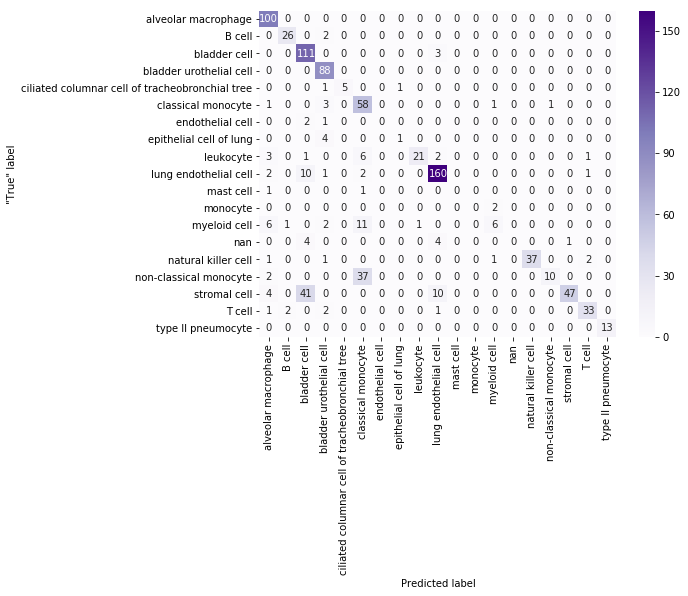

In [138]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, cmap='Purples', fmt='d')

In [139]:
confusion_percentages = 100 * confusion_df.divide(sample_weight)
confusion_percentages

Predicted label,alveolar macrophage,B cell,bladder cell,bladder urothelial cell,ciliated columnar cell of tracheobronchial tree,classical monocyte,endothelial cell,epithelial cell of lung,leukocyte,lung endothelial cell,mast cell,monocyte,myeloid cell,nan,natural killer cell,non-classical monocyte,stromal cell,T cell,type II pneumocyte
"""True"" label",,,,,,,,,,,,,,,,,,,
alveolar macrophage,100.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
B cell,0.0,92.857143,0.000000,2.272727,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
bladder cell,0.0,0.000000,97.368421,0.000000,0.000000,0.0000,0.0,0.0,0.000000,1.704545,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
bladder urothelial cell,0.0,0.000000,0.000000,100.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
ciliated columnar cell of tracheobronchial tree,0.0,0.000000,0.000000,1.136364,71.428571,0.0000,0.0,20.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
classical monocyte,1.0,0.000000,0.000000,3.409091,0.000000,90.6250,0.0,0.0,0.000000,0.000000,0.0,0.0,3.703704,0.0,0.000000,2.040816,0.000000,0.000000,0.0
endothelial cell,0.0,0.000000,1.754386,1.136364,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
epithelial cell of lung,0.0,0.000000,0.000000,4.545455,0.000000,0.0000,0.0,20.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
leukocyte,3.0,0.000000,0.877193,0.000000,0.000000,9.3750,0.0,0.0,61.764706,1.136364,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,2.564103,0.0


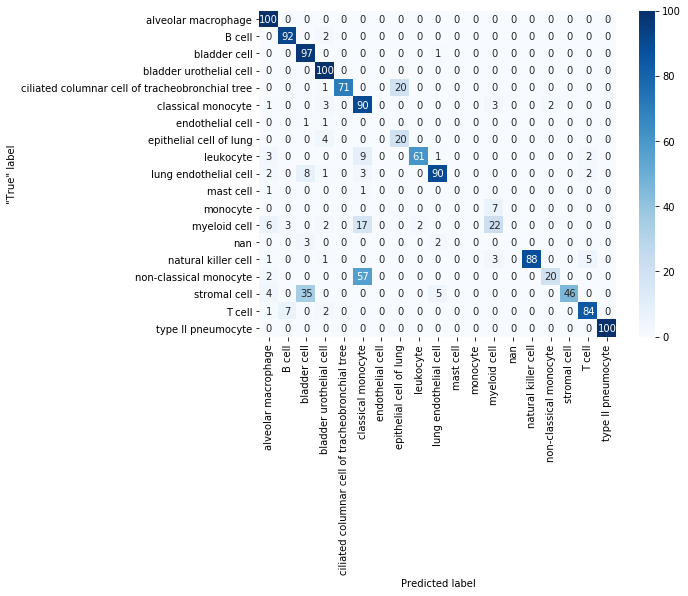

In [140]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_percentages.astype(int), annot=True, cmap='Blues', fmt='d', vmax=100)

In [141]:
metadata_bladder = metadata.query('tissue == "Bladder"')
true_labels_bladder = metadata_bladder['cell_ontology_class']
predicted_labels_bladder = guessed_cell_ontology[true_labels_bladder.index]

confusion_df_bladder = confusion_dataframe(true_labels_bladder, predicted_labels_bladder)
print(confusion_df_bladder.shape)
confusion_df_bladder.head()

precision:	0.967
recall:	0.957
fscore:	0.957
(4, 4)


/home/ubuntu/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted label,bladder cell,bladder urothelial cell,endothelial cell,leukocyte
"""True"" label",,,,
bladder cell,111,0,0,0
bladder urothelial cell,0,88,0,0
endothelial cell,2,1,0,0
leukocyte,1,0,0,1


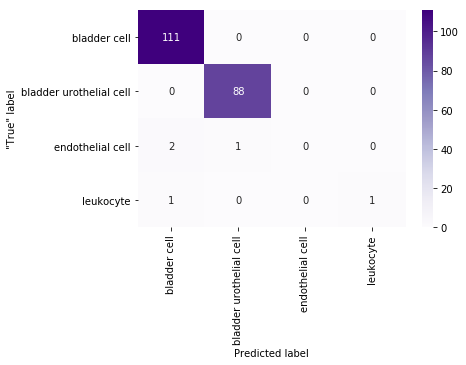

In [142]:
sns.heatmap(confusion_df_bladder, annot=True, cmap='Purples', fmt='d')

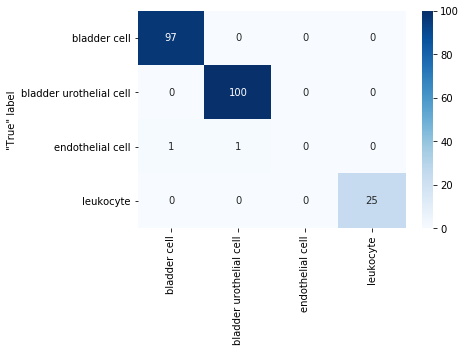

In [143]:
confusion_df_bladder_percentages = 100*confusion_df_bladder.divide(true_labels_bladder.value_counts())
sns.heatmap(confusion_df_bladder_percentages.astype(int), annot=True, cmap='Blues', fmt='d', vmax=100)

In [144]:
from sklearn.metrics import precision_recall_fscore_support

truth = true_labels_bladder
labels = sorted(truth.unique())
predicted = predicted_labels_bladder


precision, recall, fscore, support = precision_recall_fscore_support(truth, predicted, 
                                labels=labels, average='weighted')
precision, recall, fscore, support

/home/ubuntu/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.9665609375840009, 0.9569377990430622, 0.9574297840131916, None)

In [146]:
ns = np.arange(1, 27, step=2)
ns

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25])

In [148]:
use_opposite_methods = True, False

In [149]:
from tqdm import tqdm

In [156]:
dfs = []

for n, use_opposite_method in tqdm(product(ns, use_opposite_methods)):
    predicted = data_masked.apply(guess_cell_ontology, n=n, use_opposite_method=use_opposite_method, 
                                  metadata=metadata)
    df = predicted.reset_index()
    df['n_neighbors'] = n
    df['use_opposite_method'] = use_opposite_method
    dfs.append(df)
all_predictions = pd.concat(dfs, ignore_index=True)
print(all_predictions.shape)
all_predictions.head()

26it [01:24,  3.27s/it]

(23504, 4)


,cell_id,0,n_neighbors,use_opposite_method
0,A12-MAA000891-3_10_M-1-1,bladder cell,1,True
1,D6-MAA000487-3_10_M-1-1,bladder urothelial cell,1,True
2,K16-B000610-3_56_F-1-1,bladder cell,1,True
3,F4-MAA000487-3_10_M-1-1,bladder cell,1,True
4,D2-D041914-3_8_M-1-1,bladder urothelial cell,1,True


In [158]:
all_predictions = all_predictions.rename(columns={0: 'cell_ontology_class_guess'})
all_predictions.head()

,cell_id,cell_ontology_class_guess,n_neighbors,use_opposite_method
0,A12-MAA000891-3_10_M-1-1,bladder cell,1,True
1,D6-MAA000487-3_10_M-1-1,bladder urothelial cell,1,True
2,K16-B000610-3_56_F-1-1,bladder cell,1,True
3,F4-MAA000487-3_10_M-1-1,bladder cell,1,True
4,D2-D041914-3_8_M-1-1,bladder urothelial cell,1,True


In [163]:
true_labels = metadata['cell_ontology_class'].astype(str)

cell_ontology_classes = sorted(true_labels.unique(), key=lambda x: x.lower())
cell_ontology_classes

['alveolar macrophage',
 'B cell',
 'bladder cell',
 'bladder urothelial cell',
 'ciliated columnar cell of tracheobronchial tree',
 'classical monocyte',
 'endothelial cell',
 'epithelial cell of lung',
 'leukocyte',
 'lung endothelial cell',
 'mast cell',
 'monocyte',
 'myeloid cell',
 'nan',
 'natural killer cell',
 'non-classical monocyte',
 'stromal cell',
 'T cell',
 'type II pneumocyte']

In [ ]:
def score_cell_ontologies(df, true_labels, predicted_col='cell_ontology_class_guess', 
                          cell_id_col='cell_id'):
    predicted_labels = df[predicted_col]
    true_labels = true_labels[df[cell_id_col].values]
#     import pdb; pdb.set_trace()
    
    all_labels = sorted(true_labels.unique(), key=lambda x: x.lower())
    
    precision, recall, fscore, support = precision_recall_fscore_support(true_labels, predicted_labels, 
                                labels=all_labels, average='weighted')
    scores = dict(precision=precision, recall=recall, fscore=fscore, support=support)
    return pd.Series(scores)

prediction_scores = all_predictions.groupby(['n_neighbors', 'use_opposite_method']).apply(score_cell_ontologies, 
                                                                      true_labels=true_labels)
print(prediction_scores.shape)
prediction_scores.head()

In [ ]:
prediction_scores.head()

In [ ]:
prediction_scores.to_csv('/mnt/data/guess_cell_ontology_class.csv')